In [17]:
import csv
import numpy as np
from scipy import stats
from scipy.stats import mode
import math
from numpy.linalg import inv, norm, pinv
import random
import time
# I found it difficult ot de compress it in jupyter so I used Linux convert them into csv files
Tr = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_train.csv", "rb"), delimiter=",")
Tx = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_test.csv", "rb"), delimiter=",")
# print("Size of the training set:-")
# print(Tr.shape)
# print("Size of the Testing set:-")
# print(Tx.shape)
# print("Size of the Testing Labes:-")

# the first columns are the labels and rest are pixels for the 
from scipy.stats import mode
TrD = Tr[:5000,1:]              # Training data
TrL = Tr[:5000,0] 

The run time is 728.050078950839secs


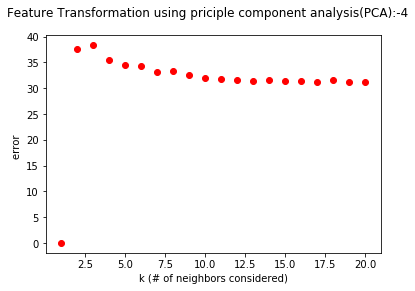

In [18]:
import time
t1=time.clock() 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import mode
def svpca(intTr,N):
    import numpy as np
    intTr=intTr.astype("float64")
    r=intTr.shape[0]
    intTr -= np.mean(intTr,axis=0)
    out,S,V= np.linalg.svd(intTr,full_matrices=False)
    return out[:,:N].dot(np.diag(S)[:N,:N]) 
    

Trd4s =svpca(TrD,4)

k=[]
calc = 1
while int(calc) < 21:
    k.append(calc)
    calc = int(calc) + 1     # k from 1 to 20
    
def prednn(Train,Test,k):
    imax = Train.shape[0]
    errork = np.zeros((20, 1))
    for kk in k[:19]:
        pred= np.zeros((TrD.shape[0], 1))
        for i in range(0,Train.shape[0]):
            tstimage=Train[i,:]   # temp image
            Distance_matrix = np.einsum('ij, ij->i', (Train-tstimage), (Train-tstimage))
            nearestks = Test[np.argsort(Distance_matrix)[1:(kk+1)]]  
            pred[i] = mode(nearestks)[0][0]
            crtpred= np.zeros((pred.shape[0], 1))  # intialize correct predictions array  
            for cnter in range(0,pred.shape[0]): 
                crtpred[cnter]=pred[cnter]==Test[cnter]     # if prediction was correct
        cpsum = np.sum(crtpred) #correct predection sum
        p = cpsum*100/imax      # Accuracy    
        errork[kk]=100-p;
        del pred
    return errork

err4s=prednn(Trd4s,TrL,k)
t2=time.clock()
runtm =t2-t1
print("The run time is "+ str(runtm)+"secs")
fig=plt.figure()
plt.plot(k,err4s, 'ro',figure=fig)
fig.suptitle("Feature Transformation using priciple component analysis(PCA):-4")
fig.axes[0].set_xlabel("k (# of neighbors considered)")
fig.axes[0].set_ylabel("error ");



In [ ]:
# If we reduce the number of pixels without affecting the 
# predections we can improve the speed to a high extend. 
# if we find a cluster and shift or transform the axis 
# according to the new features which have more information
# this method of tranforming to new axis if called pricipal component
# analysis.
# We take float type data or typecast it using astype or float command
# we normalize the data by subracting the mean from the data thus changing the axis 
# dot product between the data's single value deocompostion thus reducing the 
# dimensionality hence saving time 

